Nour Mansour and Juan Estrella

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

Part 1: Data Collection

Step 1: Get the tsv data

In [63]:
# Data is saved in the same folder as the project. Then read data from tsv file
data = pd.read_csv("train-balanced-sarcasm.csv")
data.dropna(inplace=True)
data.drop(['author', 'score', 'ups', 'downs', 'date', 'created_utc', 'subreddit', 'parent_comment'], axis = 1, inplace = True)
data.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.


Part 2: Data Processing

Step 1: Columns required: Label, Comments, subreddit, parent comment

Step 2: Create a Dataframe containing an even amount of sarcastic and non sarcastic 
comments, amount of data is 505413 each. 

In [64]:
#Copy the only the data we need
#required_data = data[['label','comment','subreddit','parent_comment']]
#required_data.head()
# Reset the indices after rows with NA values are dropped
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)
data.tail()

,label,comment
1010768,1,I'm sure that Iran and N. Korea have the techn...
1010769,1,"whatever you do, don't vote green!"
1010770,1,Perhaps this is an atheist conspiracy to make ...
1010771,1,The Slavs got their own country - it is called...
1010772,1,"values, as in capitalism .. there is good mone..."


In [65]:
#data.groupby('label').describe()

In [66]:
#rand_ind = np.random.choice(data.index, int(len(data)*10/100))
#len(rand_ind) # 101077 for 10%

#chosen_data = data.sample(frac=0.5, random_state=1)
#chosen_data.tail()



size = int(len(data)*5/100)# sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
chosen_data = data.groupby('label', as_index=False).apply(fn)
chosen_data.head()

label                                            comment
0 198103      0  Hitsugaya being in every fight is partly becau...
  546828      0  I imagine his nickname in prison would be 'The...
  989843      0        what about the part where its solo queue :/
  7539        0  Yea great example, I see Gold players pull off...
  890177      0  Well it must've been a glitch then, because I ...

In [67]:
chosen_data.reset_index(inplace = True)
chosen_data.drop(['level_0', 'level_1'], inplace = True, axis = 1)
chosen_data.head()

,label,comment
0,0,Hitsugaya being in every fight is partly becau...
1,0,I imagine his nickname in prison would be 'The...
2,0,what about the part where its solo queue :/
3,0,"Yea great example, I see Gold players pull off..."
4,0,"Well it must've been a glitch then, because I ..."


In [68]:
chosen_data.tail()

,label,comment
101071,1,Number 13 will blow your mind!
101072,1,Surprised to hear them featured in the NME
101073,1,Stay classy reddit.
101074,1,Random Beta invites for viewers would be a start
101075,1,the new robbie schremp


Part 3: Exploratory Analysis & Data Visualization

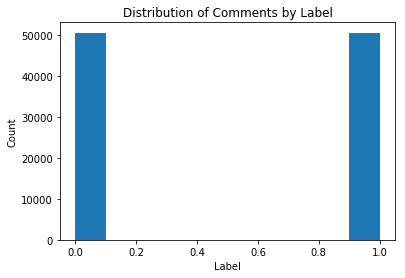

In [69]:
# Explore distribution of the data by label (0 -> non-sarcastic, 1 -> sarcastic)
plt.hist(chosen_data.label)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Comments by Label')
plt.show()

In [70]:
# Explore distribution of comments by label 
chosen_data.groupby('label').describe()

comment                            
        count unique             top freq
label                                    
0       50538  46926             Yes   38
1       50538  47165  You forgot the  138

In [71]:
#Import NLTK library
!pip install nltk

In [72]:
import nltk

In [73]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/jovyan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package

[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Pa

True

In [74]:
from nltk.corpus import stopwords #Use this to get rid off meaningless words like "the, and, a"
from nltk.tokenize import word_tokenize #Split by word
from nltk.tokenize import sent_tokenize #Split by sentence

In [75]:
#Make sure all the comment column is str data type
chosen_data['comment'] = chosen_data['comment'].astype(str)
chosen_data['comment'] = chosen_data['comment'].astype(str)

#non_sarcastic = required_data.loc[required_data['label'] == 0]
#sarcastic = required_data.loc[required_data['label'] == 1]

#drop rows with na values on the comment column
#non_sarcastic['comment'].dropna(inplace=True)
#sarcastic['comment'].dropna(inplace=True)

#Make sure all the comment column is str data type
#non_sarcastic['comment'] = non_sarcastic['comment'].astype(str)
#sarcastic['comment'] = sarcastic['comment'].astype(str)
#print(len(non_sarcastic), len(sarcastic))

In [76]:
chosen_data['comment'] = chosen_data['comment'].apply(word_tokenize)
chosen_data['POS_tag'] = chosen_data['comment'].apply(nltk.pos_tag)
chosen_data.head()

,label,comment,POS_tag
0,0,"[Hitsugaya, being, in, every, fight, is, partl...","[(Hitsugaya, NNP), (being, VBG), (in, IN), (ev..."
1,0,"[I, imagine, his, nickname, in, prison, would,...","[(I, PRP), (imagine, VBP), (his, PRP$), (nickn..."
2,0,"[what, about, the, part, where, its, solo, que...","[(what, WP), (about, IN), (the, DT), (part, NN..."
3,0,"[Yea, great, example, ,, I, see, Gold, players...","[(Yea, NNP), (great, JJ), (example, NN), (,, ,..."
4,0,"[Well, it, must, 've, been, a, glitch, then, ,...","[(Well, IN), (it, PRP), (must, MD), ('ve, VBP)..."


In [77]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

chosen_data['stem'] = chosen_data['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
chosen_data.head()

,label,comment,POS_tag,stem
0,0,"[Hitsugaya, being, in, every, fight, is, partl...","[(Hitsugaya, NNP), (being, VBG), (in, IN), (ev...","[hitsugaya, be, in, everi, fight, is, part, be..."
1,0,"[I, imagine, his, nickname, in, prison, would,...","[(I, PRP), (imagine, VBP), (his, PRP$), (nickn...","[i, imagin, his, nicknam, in, prison, would, b..."
2,0,"[what, about, the, part, where, its, solo, que...","[(what, WP), (about, IN), (the, DT), (part, NN...","[what, about, the, part, where, it, solo, queu..."
3,0,"[Yea, great, example, ,, I, see, Gold, players...","[(Yea, NNP), (great, JJ), (example, NN), (,, ,...","[yea, great, exampl, ,, i, see, gold, player, ..."
4,0,"[Well, it, must, 've, been, a, glitch, then, ,...","[(Well, IN), (it, PRP), (must, MD), ('ve, VBP)...","[well, it, must, ve, been, a, glitch, then, ,,..."


In [78]:
#data_len = len(data)
#data1 = data.iloc[0:(int(data_len/4))].copy()
#data1.tail()

In [79]:
#data2 = data.iloc[(int(data_len/4)):(int(data_len/2))].copy()
#data2.tail()

In [80]:
#data3 = data.iloc[(int(data_len/2)):(int(3*data_len/4))].copy()
#data3.tail()

In [81]:
#data4 = data.iloc[(int(3*data_len/4)):].copy()
#data4.tail()

In [82]:
# data4['comment'] = data4['comment'].apply(word_tokenize)
# data4.head()

In [83]:
# data4['POS_tag'] = data4['comment'].apply(nltk.pos_tag)
# data4.head()

In [84]:
# data4['stem'] = data4['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data4.head()

In [85]:
# data3['comment'] = data3['comment'].apply(word_tokenize)
# data3['POS_tag'] = data3['comment'].apply(nltk.pos_tag)
# data3['stem'] = data3['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data3.head()

In [86]:
# data2['comment'] = data2['comment'].apply(word_tokenize)
# data2['POS_tag'] = data2['comment'].apply(nltk.pos_tag)
# data2['stem'] = data2['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data2.head()

In [87]:
# data1['comment'] = data1['comment'].apply(word_tokenize)
# data1['POS_tag'] = data1['comment'].apply(nltk.pos_tag)
# data1['stem'] = data1['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data1.head()

In [88]:
#Divide the required data set in half to ease later comment transformations
# df1 = data.iloc[0:(int(len(data)/2))].copy()
# df1.tail()

In [89]:
# df2 = data.iloc[(int(len(data)/2)):].copy()
# df2.tail()

In [90]:
#df1['tokenized_by_sent'] = df1['comment'].apply(sent_tokenize)
#df2['tokenized_by_sent'] = df2['comment'].apply(sent_tokenize)

#data['tokenized_by_sent'] = data['comment'].apply(sent_tokenize)
#data['tokenized_by_word'] = data['comment'].apply(word_tokenize)
#word = word_tokenize(sarcastic['comment'].iloc[56269])
#word
#note to nour, so when i try to do the first line of code it shows that index 56269 has an error but when i try to 
#individually tokenized that index, it works. Not sure how to fix this.

# note to Juan: Fixed by making dropna function is working correctly

In [91]:
# Tokenize by word first half

# df1['comment'] = df1['comment'].apply(word_tokenize)
# df1.head()

In [92]:
# Tokenize by word second half

# df2['comment'] = df2['comment'].apply(word_tokenize)
# df2.head()

In [93]:
# Parts of Speech tagging first half

# df1['POS_tag'] = df1['comment'].apply(nltk.pos_tag)
# df1.head()

#data['POS_tag'] = data['tokenized_by_word'].apply(nltk.pos_tag)
#nltk.pos_tag(data.iloc[0, 5])
#entities = nltk.chunk.ne_chunk( nltk.pos_tag(data.iloc[1, 5]))
#entities.draw()

In [94]:
# Parts of Speech tagging second half

# df2['POS_tag'] = df2['comment'].apply(nltk.pos_tag)
# df2.head()

In [95]:
#data.head()
# df1_len = len(df1)
# df2_len = len(df2)
# df14 = df1.iloc[0:int(df1_len/2)].copy()
# df24 = df1.iloc[(int(df1_len/2)):].copy()
# df34 = df2.iloc[0:int(df2_len/2)].copy()
# df44 = df2.iloc[(int(df2_len/2)):].copy()

In [96]:
# Stemming
#from nltk.stem import PorterStemmer

#data['stem'] = data['tokenized_by_word'].apply(lambda x: [PorterStemmer.stem(y) for y in x])

# from nltk.stem.snowball import SnowballStemmer

# stemmer = SnowballStemmer("english")

# df14['stem'] = df14['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df14.head()

In [97]:
# df24['stem'] = df24['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df24.head()
#df2['stem'] = df2['tokenized_by_word'].apply(lambda x: [stemmer.stem(y) for y in x])
#df2.head()

In [98]:
# df34['stem'] = df34['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df34.head()

In [99]:
# df44['stem'] = df44['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df44.head()

In [100]:
#from nltk.stem import WordNetLemmatizer
#data['lemma'] = data['tokenized_by_word'].apply(WordNetLemmatizer)
# df14.append(df24.append(df34.append(df44)))
# df14.tail()

### Predicting Sarcasm

We were interested in trying different models for predicting a sarcastic comment.
To determine the features and labels for the analysis, we decided to look at the comment itself as a feature and use the given sarcastic vs non-sarcastic classification as our label.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [102]:
# Determine the features and labels for the models
features = chosen_data['stem'].apply(lambda x: ' '.join(x))
labels = chosen_data['label']

In [103]:
#list(features)

In [104]:
# TF-IDF to vectorize the data

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() # ask about max features
features = list(features)
X = vectorizer.fit_transform(features)

In [105]:
#print(vectorizer.get_feature_names())
print(X.shape)

(101076, 36655)


In [106]:
#print(X)
X.toarray() # it only works if it's an array but why does it become all 0s?
X

<101076x36655 sparse matrix of type '<class 'numpy.float64'>'
	with 951727 stored elements in Compressed Sparse Row format>

In [107]:
#print(X)

In [108]:
# Cross-validation?

chosen_data.head()

,label,comment,POS_tag,stem
0,0,"[Hitsugaya, being, in, every, fight, is, partl...","[(Hitsugaya, NNP), (being, VBG), (in, IN), (ev...","[hitsugaya, be, in, everi, fight, is, part, be..."
1,0,"[I, imagine, his, nickname, in, prison, would,...","[(I, PRP), (imagine, VBP), (his, PRP$), (nickn...","[i, imagin, his, nicknam, in, prison, would, b..."
2,0,"[what, about, the, part, where, its, solo, que...","[(what, WP), (about, IN), (the, DT), (part, NN...","[what, about, the, part, where, it, solo, queu..."
3,0,"[Yea, great, example, ,, I, see, Gold, players...","[(Yea, NNP), (great, JJ), (example, NN), (,, ,...","[yea, great, exampl, ,, i, see, gold, player, ..."
4,0,"[Well, it, must, 've, been, a, glitch, then, ,...","[(Well, IN), (it, PRP), (must, MD), ('ve, VBP)...","[well, it, must, ve, been, a, glitch, then, ,,..."


In [109]:
# Split data into Training and Test data chosen_data[['comment', 'POS_tag', 'stem']]

X_train, X_test, y_train, y_test = train_test_split(X, chosen_data.label, test_size=0.2, random_state=0)

In [110]:
# Logistic Regression

log_clf = LogisticRegression(solver='lbfgs', max_iter = 200).fit(X_train, y_train)

In [111]:
# Predict the test values

log_clf.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

In [112]:
# Logistic regression score
print(log_clf.score(X_train, y_train))
print(log_clf.score(X_test, y_test))

0.7479099678456592
0.6768401266323704


In [113]:
# SVM model

svm_clf = LinearSVC()

In [114]:
# Training the model

svm_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [115]:
print(svm_clf.score(X_train, y_train))
print(svm_clf.score(X_test, y_test))

0.807308929013109
0.6664523149980214


In [116]:
# Random Forest Classifier

rf_clf = RandomForestClassifier()

In [117]:
rf_clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

0.9792233489982686
0.6721408785120696


In [120]:
np_chunking = "NP: {<DT>?<JJ>*<NN>}"
chunk_parser = nltk.RegexpParser(np_chunking)
chosen_data['noun_phrase_chunk'] = chosen_data['POS_tag'].apply(chunk_parser.parse)


In [121]:
chosen_data.head()

,label,comment,POS_tag,stem,noun_phrase_chunk
0,0,"[Hitsugaya, being, in, every, fight, is, partl...","[(Hitsugaya, NNP), (being, VBG), (in, IN), (ev...","[hitsugaya, be, in, everi, fight, is, part, be...","[(Hitsugaya, NNP), (being, VBG), (in, IN), [(e..."
1,0,"[I, imagine, his, nickname, in, prison, would,...","[(I, PRP), (imagine, VBP), (his, PRP$), (nickn...","[i, imagin, his, nicknam, in, prison, would, b...","[(I, PRP), (imagine, VBP), (his, PRP$), [(nick..."
2,0,"[what, about, the, part, where, its, solo, que...","[(what, WP), (about, IN), (the, DT), (part, NN...","[what, about, the, part, where, it, solo, queu...","[(what, WP), (about, IN), [(the, DT), (part, N..."
3,0,"[Yea, great, example, ,, I, see, Gold, players...","[(Yea, NNP), (great, JJ), (example, NN), (,, ,...","[yea, great, exampl, ,, i, see, gold, player, ...","[(Yea, NNP), [(great, JJ), (example, NN)], (,,..."
4,0,"[Well, it, must, 've, been, a, glitch, then, ,...","[(Well, IN), (it, PRP), (must, MD), ('ve, VBP)...","[well, it, must, ve, been, a, glitch, then, ,,...","[(Well, IN), (it, PRP), (must, MD), ('ve, VBP)..."


In [122]:
joined_tag = []
for index, row in chosen_data.iterrows():
    joined_tag.append(' '.join([word + "_" + pos for word, pos in row['POS_tag']]))
chosen_data['joined_POS_tag'] = joined_tag.copy()
chosen_data

,label,comment,POS_tag,stem,noun_phrase_chunk,joined_POS_tag
0,0,"[Hitsugaya, being, in, every, fight, is, partl...","[(Hitsugaya, NNP), (being, VBG), (in, IN), (ev...","[hitsugaya, be, in, everi, fight, is, part, be...","[(Hitsugaya, NNP), (being, VBG), (in, IN), [(e...",Hitsugaya_NNP being_VBG in_IN every_DT fight_N...
1,0,"[I, imagine, his, nickname, in, prison, would,...","[(I, PRP), (imagine, VBP), (his, PRP$), (nickn...","[i, imagin, his, nicknam, in, prison, would, b...","[(I, PRP), (imagine, VBP), (his, PRP$), [(nick...",I_PRP imagine_VBP his_PRP$ nickname_NN in_IN p...
2,0,"[what, about, the, part, where, its, solo, que...","[(what, WP), (about, IN), (the, DT), (part, NN...","[what, about, the, part, where, it, solo, queu...","[(what, WP), (about, IN), [(the, DT), (part, N...",what_WP about_IN the_DT part_NN where_WRB its_...
3,0,"[Yea, great, example, ,, I, see, Gold, players...","[(Yea, NNP), (great, JJ), (example, NN), (,, ,...","[yea, great, exampl, ,, i, see, gold, player, ...","[(Yea, NNP), [(great, JJ), (example, NN)], (,,...","Yea_NNP great_JJ example_NN ,_, I_PRP see_VBP ..."
4,0,"[Well, it, must, 've, been, a, glitch, then, ,...","[(Well, IN), (it, PRP), (must, MD), ('ve, VBP)...","[well, it, must, ve, been, a, glitch, then, ,,...","[(Well, IN), (it, PRP), (must, MD), ('ve, VBP)...",Well_IN it_PRP must_MD 've_VBP been_VBN a_DT g...
5,0,"[If, Bolvar, was, 6/7, for, 5, mana, (, silenc...","[(If, IN), (Bolvar, NNP), (was, VBD), (6/7, CD...","[if, bolvar, was, 6/7, for, 5, mana, (, silenc...","[(If, IN), (Bolvar, NNP), (was, VBD), (6/7, CD...",If_IN Bolvar_NNP was_VBD 6/7_CD for_IN 5_CD ma...
6,0,[BACON],"[(BACON, NN)]",[bacon],"[[(BACON, NN)]]",BACON_NN
7,0,"[Sounds, like, a, Kmart, customer, .]","[(Sounds, NNS), (like, IN), (a, DT), (Kmart, N...","[sound, like, a, kmart, custom, .]","[(Sounds, NNS), (like, IN), (a, DT), (Kmart, N...",Sounds_NNS like_IN a_DT Kmart_NNP customer_NN ._.
8,0,"[Windows, 7, ,, but, you, either, need, to, ta...","[(Windows, NNS), (7, CD), (,, ,), (but, CC), (...","[window, 7, ,, but, you, either, need, to, tak...","[(Windows, NNS), (7, CD), (,, ,), (but, CC), (...","Windows_NNS 7_CD ,_, but_CC you_PRP either_RB ..."
9,0,"[Anytime, I, 've, see, this, guys, videos, I, ...","[(Anytime, NNP), (I, PRP), ('ve, VBP), (see, V...","[anytim, i, ve, see, this, guy, video, i, want...","[(Anytime, NNP), (I, PRP), ('ve, VBP), (see, V...",Anytime_NNP I_PRP 've_VBP see_VB this_DT guys_...
